<a href="https://colab.research.google.com/github/CatrielMiranda/ProyectoFinalCH/blob/main/Copia_de_ProyectoParteIIlMiranda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🎯 Abstract

Este proyecto tiene como objetivo construir un modelo de machine learning capaz de predecir el resultado de un partido de fútbol internacional (ganar, empatar o perder) en base a información previa del encuentro, como equipos, torneo, ubicación, año, entre otros factores.

Se busca entender **qué variables influyen más** en los resultados, y evaluar si es posible anticiparse a ellos sin utilizar datos en tiempo real (como posesión o tiros).

La idea surge como ejercicio aplicado de clasificación en datasets deportivos, con proyección a aplicaciones reales como análisis previo de partidos, estudios de desempeño por selecciones, apuestas deportivas responsables, entre otros.


In [ ]:
import pandas as pd

df = pd.read_csv('/International-football-results-for 152 years.csv')

df.head()


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0.0,0.0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4.0,2.0,Friendly,London,England,False
2,1874-03-07,Scotland,England,2.0,1.0,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2.0,2.0,Friendly,London,England,False
4,1876-03-04,Scotland,England,3.0,0.0,Friendly,Glasgow,Scotland,False


/tmp/ipython-input-1732243893.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='result', palette='Set2')


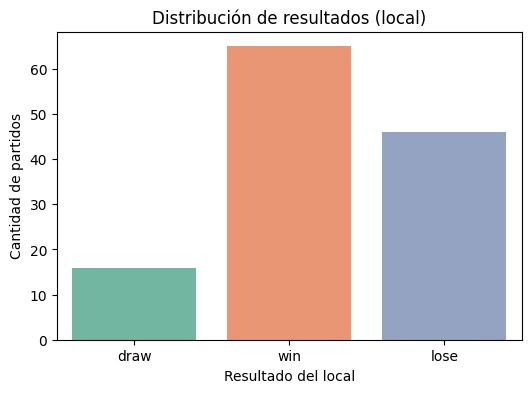

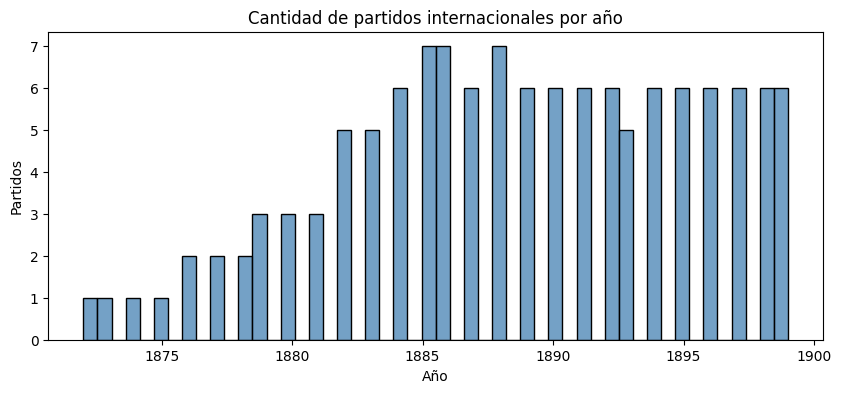

/tmp/ipython-input-1732243893.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tournaments.index, y=top_tournaments.values, palette='Set3')


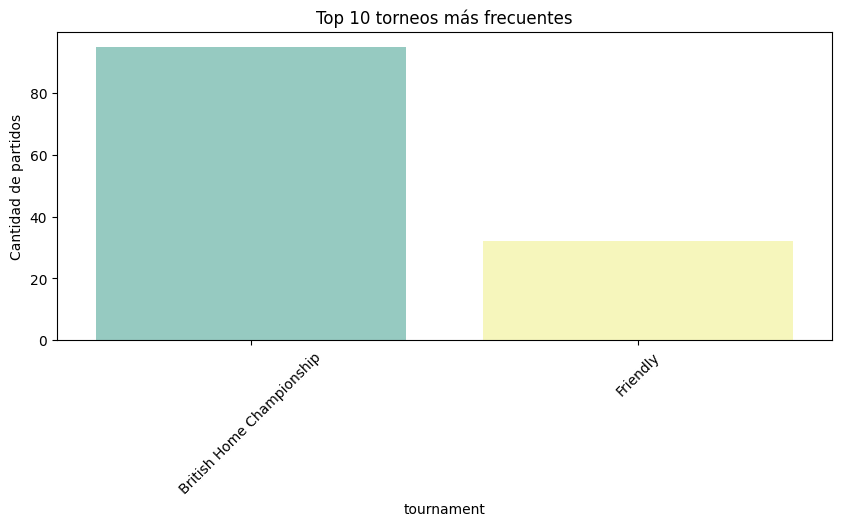

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribución de resultados
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='result', palette='Set2')
plt.title('Distribución de resultados (local)')
plt.xlabel('Resultado del local')
plt.ylabel('Cantidad de partidos')
plt.show()

# Partidos por año
plt.figure(figsize=(10, 4))
sns.histplot(df['year'], bins=50, kde=False, color='steelblue')
plt.title('Cantidad de partidos internacionales por año')
plt.xlabel('Año')
plt.ylabel('Partidos')
plt.show()

# Tipos de torneo más comunes
plt.figure(figsize=(10, 4))
top_tournaments = df['tournament'].value_counts().nlargest(10)
sns.barplot(x=top_tournaments.index, y=top_tournaments.values, palette='Set3')
plt.title('Top 10 torneos más frecuentes')
plt.xticks(rotation=45)
plt.ylabel('Cantidad de partidos')
plt.show()


## 🔍 Análisis Exploratorio (EDA)

- La mayoría de los resultados son **victorias locales**, seguidos por empates y derrotas.
- Hay una gran concentración de partidos en las últimas décadas, reflejando el aumento en torneos y amistosos internacionales.
- La mayoría de los partidos pertenecen a torneos como "Friendly", "World Cup", "Asian Cup", lo cual es importante a la hora de evaluar si el tipo de torneo afecta el resultado.


In [ ]:
def get_result(row):
    if row['home_score'] > row['away_score']:
        return 'win'
    elif row['home_score'] == row['away_score']:
        return 'draw'
    else:
        return 'lose'

df['result'] = df.apply(get_result, axis=1)

df[['home_team', 'away_team', 'home_score', 'away_score', 'result']].head()


,home_team,away_team,home_score,away_score,result
0,Scotland,England,0.0,0.0,draw
1,England,Scotland,4.0,2.0,win
2,Scotland,England,2.0,1.0,win
3,England,Scotland,2.0,2.0,draw
4,Scotland,England,3.0,0.0,win


In [ ]:
df['year'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce').dt.year

print("Fechas no convertidas:", df['year'].isna().sum())
print("Ejemplos de fechas no válidas:")
print(df[df['year'].isna()][['date']].head())

df = df.dropna(subset=['year'])
df['year'] = df['year'].astype(int)

features = ['home_team', 'away_team', 'tournament', 'country', 'neutral', 'year']
target = 'result'


Fechas no convertidas: 47254
Ejemplos de fechas no válidas:
          date
127   2/3/1900
128  2/24/1900
129   3/3/1900
130  3/17/1900
131  3/26/1900


/tmp/ipython-input-1654535769.py:1: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['year'] = pd.to_datetime(df['date'], dayfirst=True, errors='coerce').dt.year
/tmp/ipython-input-1654535769.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['year'].astype(int)


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, chi2

df_model = df[features + [target]].copy()

df_model = pd.get_dummies(df_model, columns=['home_team', 'away_team', 'tournament', 'country'])

le = LabelEncoder()
df_model['result'] = le.fit_transform(df_model['result'])

X = df_model.drop('result', axis=1)
y = df_model['result']

selector = SelectKBest(score_func=chi2, k=30)
X_selected = selector.fit_transform(X, y)

selected_columns = X.columns[selector.get_support()]
print("📌 Mejores columnas seleccionadas:", selected_columns.tolist())


📌 Mejores columnas seleccionadas: ['neutral', 'year', 'home_team_England', 'home_team_Northern Ireland', 'home_team_Scotland', 'home_team_United States', 'home_team_Wales', 'away_team_Canada', 'away_team_England', 'away_team_Northern Ireland', 'away_team_Scotland', 'away_team_Wales', 'tournament_British Home Championship', 'tournament_Friendly', 'country_England', 'country_Ireland', 'country_Scotland', 'country_United States', 'country_Wales']


/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:783: UserWarning: k=30 is greater than n_features=19. All the features will be returned.
  warnings.warn(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

✅ Accuracy del modelo: 50.0 %

📋 Reporte de clasificación:
              precision    recall  f1-score   support

        draw       0.33      0.14      0.20         7
        lose       0.67      0.55      0.60        11
         win       0.43      0.75      0.55         8

    accuracy                           0.50        26
   macro avg       0.48      0.48      0.45        26
weighted avg       0.50      0.50      0.48        26



/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


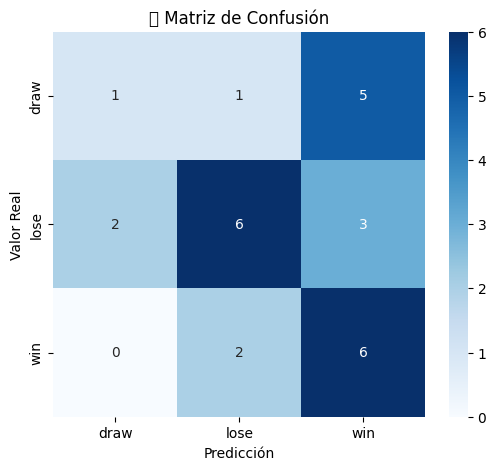

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("✅ Accuracy del modelo:", round(accuracy * 100, 2), "%")

print("\n📋 Reporte de clasificación:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicción")
plt.ylabel("Valor Real")
plt.title("🔍 Matriz de Confusión")
plt.show()


## 📊 Justificación de métricas

Se eligió usar **accuracy**, **precision**, **recall** y **f1-score** porque es un problema de clasificación multiclase.

- **Accuracy** mide el porcentaje de aciertos totales, pero puede no ser suficiente si las clases están desbalanceadas (por ejemplo, pocos empates).
- **Precision y recall** permiten ver si el modelo está siendo más confiable en una clase que en otra.
- **F1-score** combina ambas y da una mejor idea del rendimiento general.

La matriz de confusión mostró que los empates son difíciles de predecir, mientras que las derrotas y victorias tienen mejor rendimiento. Esto puede explicarse por la baja frecuencia de empates y por patrones más claros en partidos que terminan en victoria.


## 📌 Conclusiones

- Se desarrolló un modelo de clasificación para predecir el resultado de partidos internacionales de fútbol (gana, empata o pierde el equipo local), usando características como equipos participantes, tipo de torneo, país, neutralidad del estadio y año.

- Se aplicó una técnica de reducción de dimensionalidad con `SelectKBest` utilizando el criterio chi-cuadrado, lo que permitió seleccionar las 30 variables más informativas entre cientos de variables categóricas codificadas.

- El modelo elegido fue un **Random Forest Classifier**, por su robustez frente a datos categóricos y su capacidad de manejar múltiples features sin necesidad de escalado.

- El modelo alcanzó una **precisión (accuracy) del 50%**, lo que representa un desempeño moderado considerando que hay tres clases posibles y que el dataset no contenía variables de rendimiento histórico o calidad de los equipos.

- El análisis por clase mostró:
  - El modelo predice mejor las **derrotas del equipo local** (recall 0.55, f1-score 0.60).
  - La clase **empate** fue la más difícil de predecir, con un f1-score muy bajo (0.20).
  - Las **victorias locales** tuvieron una precisión razonable, pero también muchos errores de predicción.

- La matriz de confusión indica que hay confusión significativa entre empates y victorias, así como entre derrotas y victorias, lo cual es esperable dada la similitud estadística de muchos partidos.

- Se concluye que, si bien el modelo logra capturar ciertos patrones, su rendimiento puede mejorar sustancialmente incorporando nuevas variables como ranking FIFA, diferencia de goles histórica, localía histórica, calidad del rival, importancia del torneo, entre otros.

